In [96]:
import pandas as pd
import sqlite3

In [97]:
connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
connection

In [98]:
request = '''
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(request, connection, parse_dates=['timestamp'])
commits

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [99]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)
commits

,date,hour
0,2020-04-17,5
1,2020-04-17,5
2,2020-04-17,5
3,2020-04-17,5
4,2020-04-17,5
...,...,...
3202,2020-05-21,20
3203,2020-05-21,20
3204,2020-05-21,20
3205,2020-05-21,20


In [100]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]
working_day

,date,hour
0,2020-04-17,5
1,2020-04-17,5
2,2020-04-17,5
3,2020-04-17,5
4,2020-04-17,5
...,...,...
3202,2020-05-21,20
3203,2020-05-21,20
3204,2020-05-21,20
3205,2020-05-21,20


In [101]:
weekend

,date,hour
23,2020-04-18,7
24,2020-04-18,13
25,2020-04-18,13
26,2020-04-18,13
27,2020-04-18,13
...,...,...
3088,2020-05-17,22
3089,2020-05-17,22
3090,2020-05-17,22
3091,2020-05-17,22


In [102]:
working_day_df = working_day.groupby('hour').date.value_counts().unstack(0)
working_day_df

hour,0,3,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2020-04-17,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,3.0,7.0,NaN,3.0,NaN,10.0,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,6.0,2.0,6.0,NaN,2.0,NaN
2020-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4.0,10.0,1.0,3.0,6.0,NaN
2020-04-23,2.0,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,18.0,NaN,NaN
2020-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,2.0,10.0,NaN,NaN,NaN,NaN,2.0,NaN
2020-04-27,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2020-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,6.0,NaN


In [103]:
weekend_df = df_2 = weekend.groupby('hour').date.value_counts().unstack(0)
weekend_df

hour,0,1,3,5,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2020-04-18,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,25.0,NaN,7.0,8.0,6.0,4.0,5.0,5.0,NaN
2020-04-19,2.0,NaN,NaN,2.0,NaN,NaN,2.0,7.0,5.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,8.0,NaN,NaN
2020-04-25,NaN,NaN,1.0,NaN,10.0,8.0,3.0,NaN,8.0,7.0,...,4.0,8.0,6.0,15.0,8.0,4.0,10.0,8.0,3.0,1.0
2020-04-26,2.0,NaN,NaN,NaN,2.0,6.0,NaN,10.0,8.0,14.0,...,7.0,14.0,27.0,16.0,27.0,47.0,50.0,18.0,5.0,2.0
2020-05-02,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,84.0,19.0,...,28.0,18.0,24.0,2.0,NaN,10.0,8.0,NaN,NaN,16.0
2020-05-03,NaN,NaN,NaN,NaN,NaN,13.0,11.0,10.0,13.0,14.0,...,19.0,11.0,NaN,NaN,15.0,13.0,34.0,7.0,NaN,1.0
2020-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,8.0,2.0,NaN,NaN,4.0,4.0,4.0,14.0,36.0,12.0
2020-05-10,2.0,6.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,18.0,27.0,16.0,4.0,NaN,13.0,4.0,NaN,2.0,NaN
2020-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN


In [104]:
index = pd.RangeIndex(stop=24)
working_day_df = working_day_df.mean()
working_day_df = working_day_df.reindex(index=index, fill_value=0)
working_day_df = working_day_df.rename('working_day')
working_day_df

0      3.000000
1      0.000000
2      0.000000
3      2.000000
4      0.000000
5      7.500000
6      1.500000
7      5.166667
8      3.700000
9      6.000000
10    13.200000
11     6.769231
12     7.181818
13     8.111111
14    10.166667
15    12.818182
16    18.888889
17    16.000000
18    15.181818
19    17.833333
20    14.076923
21    24.333333
22     3.750000
23     5.000000
Name: working_day, dtype: float64

In [105]:
weekend_df = weekend_df.mean()
weekend_df = weekend_df.reindex(index=index, fill_value=0)
weekend_df = weekend_df.rename('weekend')
weekend_df

0      2.000000
1      6.000000
2      0.000000
3      1.000000
4      0.000000
5      2.000000
6      0.000000
7      4.000000
8      7.000000
9      3.666667
10     7.000000
11    23.600000
12     9.500000
13    18.000000
14    12.428571
15    14.250000
16    14.800000
17     7.142857
18     9.714286
19    13.125000
20    13.000000
21    10.285714
22     9.833333
23     6.400000
Name: weekend, dtype: float64

In [106]:
working_day_df[17]

16.0

In [107]:
weekend_df[17]

7.142857142857143

In [108]:
concatenation = pd.concat([weekend_df, working_day_df], axis=1)
concatenation = concatenation.rename_axis('hour')
concatenation

,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


## choose a palette that you really enjoy, you do not have to replicate it from the graph above

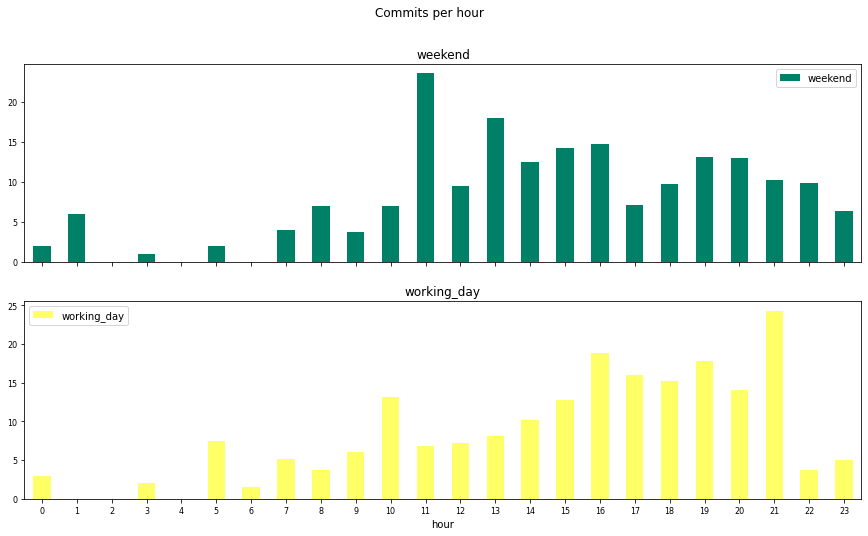

In [109]:
axes = concatenation.plot.bar(figsize=(15,8), title='Commits per hour', rot=0, fontsize=8,
                              colormap='summer', sharex=True, subplots=True)

#### “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

In [110]:
concatenation['weekend'].idxmax()

11

In [111]:
concatenation['working_day'].idxmax()

21

In [112]:
connection.close()